In [ ]:
#1 b

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the CSV file
df = pd.read_csv("hamspam.csv.csv")
if "ID" in df.columns:
    df.drop(columns=["ID"], inplace=True)

In [26]:
# Convert categorical columns to numerical values
label_encoders = {}
for col in ["Contains Link", "Contains Money Words", "Length", "Class"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for inverse transformation if needed


In [28]:
# Split into features and target
X = df.drop(columns=["Class"])
y = df["Class"]

In [30]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# **Naïve Bayes Model**
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)


In [34]:
# **K-Nearest Neighbors Model**
k = 2  # Change K as needed
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)


In [36]:
# evaluating performance
nb_accuracy = accuracy_score(y_test, nb_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)

In [38]:
print(f"Naïve Bayes Accuracy: {nb_accuracy:.2f}")
print(f"KNN (k={k}) Accuracy: {knn_accuracy:.2f}")

Naïve Bayes Accuracy: 0.54
KNN (k=2) Accuracy: 0.53


In [40]:
# **Test on a New Example**
test_example = pd.DataFrame([[1, 0, 1]], columns=["Contains Link", "Contains Money Words", "Length"])
nb_prediction = nb_model.predict(test_example)
knn_prediction = knn_model.predict(test_example)


In [42]:
nb_result = label_encoders["Class"].inverse_transform(nb_prediction)
knn_result = label_encoders["Class"].inverse_transform(knn_prediction)


In [44]:
print(f"📌 Naïve Bayes Prediction: {nb_result[0]}")
print(f"📌 KNN (k={k}) Prediction: {knn_result[0]}")

📌 Naïve Bayes Prediction: Spam
📌 KNN (k=2) Prediction: Ham


In [74]:
# 1 B
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('hamspam.csv.csv')
if "ID" in df.columns:
    df.drop(columns=["ID"], inplace=True)



In [76]:
# Convert categorical columns to numerical values
label_encoders = {}
for col in ["Contains Link", "Contains Money Words", "Length", "Class"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for inverse transformation if needed



In [78]:
# Split into features and target
X = df.drop(columns=["Class"])
y = df["Class"]


In [80]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Initialize and fit the Decision Tree model (with reduced max_depth to avoid overfitting)
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

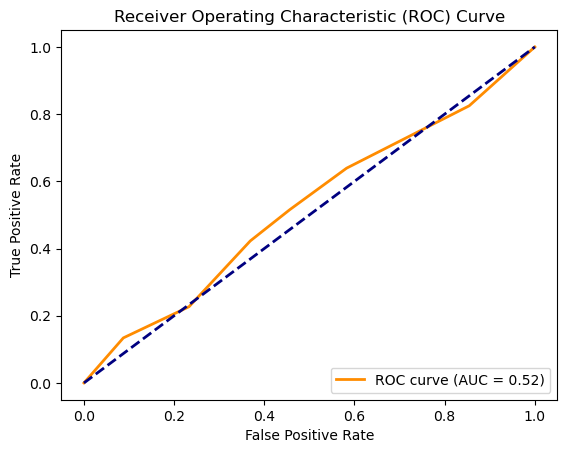

AUC Score: 0.52


In [88]:
y_probs = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)  # 1 -> spam
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f'AUC Score: {roc_auc:.2f}')